In [1]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

import importlib
import utils
import glob
from collections import defaultdict

import seaborn as sns
import pandas as pd

def in_notebook():
    try:
        from IPython import get_ipython
        if 'IPKernelApp' not in get_ipython().config:  # pragma: no cover
            return False
    except ImportError:
        return False
    except AttributeError:
        return False
    return True

def show_plt_if_in_notebook(title=None):
    if in_notebook():
        plt.show()
    else:
        plt.savefig(title)

# Metrics

/scratch/gpfs/qanguyen/mind_reader/Lafite_rep_1680510923.601494.pth.tar
/scratch/gpfs/qanguyen/mind_reader/Lafite_rep_1680510923.601494.pth.tar plotting 81
dict_keys(['loss_GAN_Generator', 'Lc1', 'Lc2', 'pl_penalty', 'loss_Dreal', 'Lc1_txt_txt', 'Lc1_img_img', 'r1_penalty'])


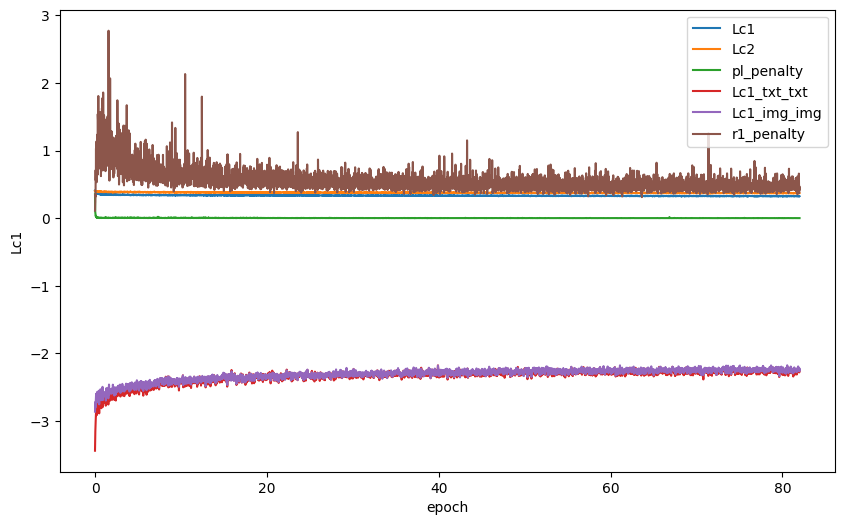

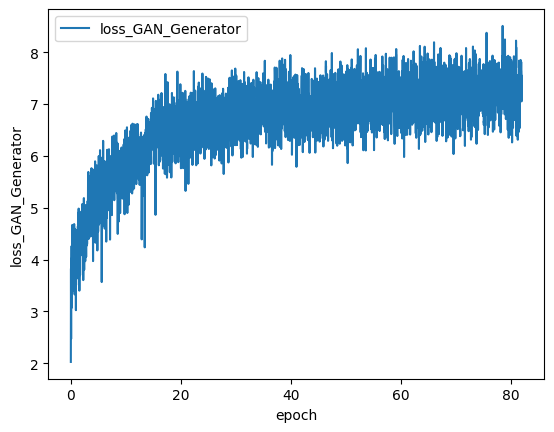

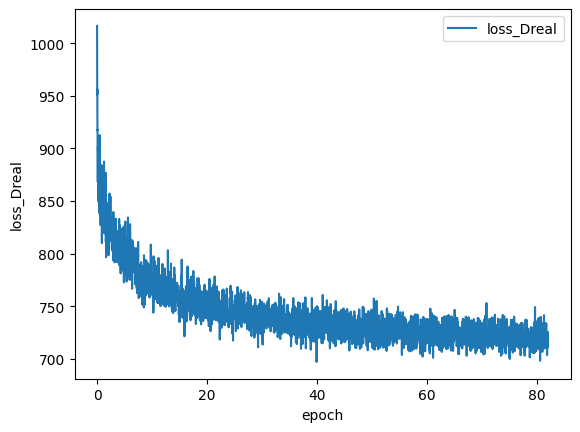

In [2]:

def get_record(order, is_online, extra = "", title = None,  
               zero_out_list = None,
               image_transform_loader_list = None,
               tiling_orientation_ablation_list = None,
               tiling_list = None,
               outdir = "/scratch/gpfs/qanguyen/poly1/",
              palette = sns.color_palette("Set3", 10),
               hue_variable = "data_rescale"
):
     
    warnings.filterwarnings(action='once')
    
    
    record_names = glob.glob(f"{outdir}/Lafite_rep*pth.tar")
    
    #record_included = [int(r.split("_")[-1].split(".")[0]) for r in record_names]
    #record_included = [((r > 1675853450) and (r < 1675912720)) for r in record_included]
    #record_names = [ r for i,r in enumerate(record_names) if record_included[i] == True]
    #print(record_names, len(record_names))
    fig, ax = plt.subplots(figsize=(10, 6))
    for f in record_names :
        print(f)
        try:
            
            record = torch.load(f, map_location = torch.device('cpu')) 
        except Exception as e: 
            print(e)
         
#         try:
#             if record.curr_epoch < 12:
#                 continue
#             #if (zero_out_list is not None) and (record.args.zero_out not in zero_out_list):
#             #    continue

#         except Exception as e: 
#             print(e)
#             continue
        print(f, "plotting", record.curr_epoch )
        print( record.metrics.keys() )
        for metric in record.metrics:
            if metric in ["loss_GAN_Generator", "loss_Dreal"]: continue
            pars = defaultdict(list)
            i = 0 
            # record.metrics[metric]: dict of epoch: list 
            for epoch, metric_list in sorted(record.metrics[metric].items(), key=lambda x: x[0]):
                pars[metric].extend([i.item() for i in metric_list])
                pars["epoch"].extend([epoch + i/len(metric_list) for i in range(len(metric_list))])
                 

    
            pars = pd.DataFrame.from_dict(pars) 
            pars = pars.sort_values(by=hue_variable, ascending=True) if hue_variable is not None else pars
            # display(pars)
            sns.lineplot(x = "epoch", y= metric, 
                          label=metric,
                         palette = palette, data=pars  )
  
 
    show_plt_if_in_notebook()
    for metric in record.metrics:
        if metric not in ["loss_GAN_Generator" ]: continue
        pars = defaultdict(list)
        i = 0 
        # record.metrics[metric]: dict of epoch: list 
        for epoch, metric_list in sorted(record.metrics[metric].items(), key=lambda x: x[0]):
            pars[metric].extend([i.item() for i in metric_list])
            pars["epoch"].extend([epoch + i/len(metric_list) for i in range(len(metric_list))])



        pars = pd.DataFrame.from_dict(pars) 
        pars = pars.sort_values(by=hue_variable, ascending=True) if hue_variable is not None else pars
        # display(pars)
        sns.lineplot(x = "epoch", y= metric, 
                      label=metric,
                     palette = palette, data=pars  )
  
 
    show_plt_if_in_notebook()
    
    for metric in record.metrics:
        if metric not in [  "loss_Dreal"]: continue
        pars = defaultdict(list)
        i = 0 
        # record.metrics[metric]: dict of epoch: list 
        for epoch, metric_list in sorted(record.metrics[metric].items(), key=lambda x: x[0]):
            pars[metric].extend([i.item() for i in metric_list])
            pars["epoch"].extend([epoch + i/len(metric_list) for i in range(len(metric_list))])



        pars = pd.DataFrame.from_dict(pars) 
        pars = pars.sort_values(by=hue_variable, ascending=True) if hue_variable is not None else pars
        # display(pars)
        sns.lineplot(x = "epoch", y= metric, 
                      label=metric,
                     palette = palette, data=pars  )
  
 
    show_plt_if_in_notebook()
    
import warnings

 
workdir = "/scratch/gpfs/qanguyen"
 
get_record( order = "*",  
           is_online=False, title = f"Imagenet loss, loss vs. data_rescale",
           palette = sns.color_palette("deep", 15),
           outdir = f"{workdir}/mind_reader",
           zero_out_list = None,
           image_transform_loader_list = ['TileImagenet'],
           hue_variable =  None,
           tiling_orientation_ablation_list = [True, False],
           tiling_list = ["1,1", "1,2", "1,3", "2,1", "2,2", "2,3", "3,1", "3,2", "3,3"]
          ) 

# Visualize model output

In [ ]:

def get_record(order, is_online, extra = "", title = None,  
               zero_out_list = None,
               image_transform_loader_list = None,
               tiling_orientation_ablation_list = None,
               tiling_list = None,
               outdir = "/scratch/gpfs/qanguyen/poly1/",
              palette = sns.color_palette("Set3", 10),
               hue_variable = "data_rescale"
):
     
    warnings.filterwarnings(action='once')
    
    
    record_names = glob.glob(f"{outdir}/Lafite_rep*pth.tar")
    
    #record_included = [int(r.split("_")[-1].split(".")[0]) for r in record_names]
    #record_included = [((r > 1675853450) and (r < 1675912720)) for r in record_included]
    #record_names = [ r for i,r in enumerate(record_names) if record_included[i] == True]
    #print(record_names, len(record_names))
    fig, ax = plt.subplots(figsize=(10, 6))
    for f in record_names :
        print(f)
        try:
            
            record = torch.load(f, map_location = torch.device('cpu')) 
        except Exception as e: 
            print(e)
         
#         try:
#             if record.curr_epoch < 12:
#                 continue
#             #if (zero_out_list is not None) and (record.args.zero_out not in zero_out_list):
#             #    continue

#         except Exception as e: 
#             print(e)
#             continue
        print(f, "plotting", record.curr_epoch )
        print( record.metrics.keys() )
        for metric in record.metrics:
            if metric in ["loss_GAN_Generator", "loss_Dreal"]: continue
            pars = defaultdict(list)
            i = 0 
            # record.metrics[metric]: dict of epoch: list 
            for epoch, metric_list in sorted(record.metrics[metric].items(), key=lambda x: x[0]):
                pars[metric].extend([i.item() for i in metric_list])
                pars["epoch"].extend([epoch + i/len(metric_list) for i in range(len(metric_list))])
                 

    
            pars = pd.DataFrame.from_dict(pars) 
            pars = pars.sort_values(by=hue_variable, ascending=True) if hue_variable is not None else pars
            # display(pars)
            sns.lineplot(x = "epoch", y= metric, 
                          label=metric,
                         palette = palette, data=pars  )
  
 
    show_plt_if_in_notebook()
    for metric in record.metrics:
        if metric not in ["loss_GAN_Generator" ]: continue
        pars = defaultdict(list)
        i = 0 
        # record.metrics[metric]: dict of epoch: list 
        for epoch, metric_list in sorted(record.metrics[metric].items(), key=lambda x: x[0]):
            pars[metric].extend([i.item() for i in metric_list])
            pars["epoch"].extend([epoch + i/len(metric_list) for i in range(len(metric_list))])



        pars = pd.DataFrame.from_dict(pars) 
        pars = pars.sort_values(by=hue_variable, ascending=True) if hue_variable is not None else pars
        # display(pars)
        sns.lineplot(x = "epoch", y= metric, 
                      label=metric,
                     palette = palette, data=pars  )
  
 
    show_plt_if_in_notebook()
    
    for metric in record.metrics:
        if metric not in [  "loss_Dreal"]: continue
        pars = defaultdict(list)
        i = 0 
        # record.metrics[metric]: dict of epoch: list 
        for epoch, metric_list in sorted(record.metrics[metric].items(), key=lambda x: x[0]):
            pars[metric].extend([i.item() for i in metric_list])
            pars["epoch"].extend([epoch + i/len(metric_list) for i in range(len(metric_list))])



        pars = pd.DataFrame.from_dict(pars) 
        pars = pars.sort_values(by=hue_variable, ascending=True) if hue_variable is not None else pars
        # display(pars)
        sns.lineplot(x = "epoch", y= metric, 
                      label=metric,
                     palette = palette, data=pars  )
  
 
    show_plt_if_in_notebook()
    
import warnings

 
workdir = "/scratch/gpfs/qanguyen"
 
get_record( order = "*",  
           is_online=False, title = f"Imagenet loss, loss vs. data_rescale",
           palette = sns.color_palette("deep", 15),
           outdir = f"{workdir}/mind_reader",
           zero_out_list = None,
           image_transform_loader_list = ['TileImagenet'],
           hue_variable =  None,
           tiling_orientation_ablation_list = [True, False],
           tiling_list = ["1,1", "1,2", "1,3", "2,1", "2,2", "2,3", "3,1", "3,2", "3,3"]
          ) 

# Data loader experiment

In [10]:
import webdataset as wds
import torch
import random
import numpy as np
train_url = "/scratch/gpfs/KNORMAN/webdataset_nsd/webdataset_avg_split/train/train_subj01_{0..17}.tar"
# “{/fsx/proj-medarc/fmri/natural-scenes-dataset/webdataset_avg_split/train/train_subj01_{0..17}.tar,/fsx/proj-medarc/fmri/natural-scenes-dataset/webdataset_avg_split/val/val_subj01_0.tar}”
test_url = "/scratch/gpfs/KNORMAN/webdataset_nsd/webdataset_avg_split/test/test_subj01_{0..1}.tar"
# “/fsx/proj-medarc/fmri/natural-scenes-dataset/webdataset_avg_split/test/test_subj01_{0..1}.tar”
meta_url = "/scratch/gpfs/KNORMAN/webdataset_nsd/webdataset_avg_split/metadata_subj01.json"
# “/fsx/proj-medarc/fmri/natural-scenes-dataset/webdataset_avg_split/metadata_subj01.json”
num_train = 8559 + 300
num_val = 982
batch_size = 16
num_workers = 1
voxels_key="nsdgeneral.npy",
to_tuple=["voxels", "images", "trial", "idx"]
# for loading dataloader
test_data = wds.WebDataset(test_url, resampled=False) \
    .decode("torch") \
    .rename(images="jpg;png", voxels="nsdgeneral.npy", trial="trial.npy", coco= "coco73k.npy", reps="num_uniques.npy", \
               idx = "__key__"
               )\
    .to_tuple(*to_tuple) \
    .batched(batch_size, partial=True)
test_dl = torch.utils.data.DataLoader(test_data, batch_size=None, num_workers=num_workers, shuffle=False)

In [19]:
def save_checkpoint(state, save_dir = "./", filename='checkpoint.pth.tar'):
    torch.save(state, f"{save_dir}/{filename}")
    

start = 0
test_indices_batchidx_dict = {}
for batch_id, b in enumerate(test_dl):
    indices = b[3] 
    
    test_indices_batchidx_dict.update({sample: start + i for i, sample in enumerate(indices)})
    start += len(indices)

save_checkpoint(test_indices_batchidx_dict, save_dir = "/scratch/gpfs/KNORMAN/alex_mindreader", 
                filename='subj01_test_indices_batchidx_dict.pth.tar')
print(test_indices_batchidx_dict)

{'sample000000349': 0, 'sample000000355': 1, 'sample000000365': 2, 'sample000000368': 3, 'sample000000376': 4, 'sample000000377': 5, 'sample000000378': 6, 'sample000000379': 7, 'sample000000383': 8, 'sample000000406': 9, 'sample000000415': 10, 'sample000000416': 11, 'sample000000418': 12, 'sample000000435': 13, 'sample000000446': 14, 'sample000000448': 15, 'sample000000455': 16, 'sample000000465': 17, 'sample000000469': 18, 'sample000000470': 19, 'sample000000472': 20, 'sample000000478': 21, 'sample000000486': 22, 'sample000000497': 23, 'sample000000498': 24, 'sample000000507': 25, 'sample000000511': 26, 'sample000000523': 27, 'sample000000532': 28, 'sample000000547': 29, 'sample000000551': 30, 'sample000000568': 31, 'sample000000573': 32, 'sample000000578': 33, 'sample000000592': 34, 'sample000000595': 35, 'sample000000599': 36, 'sample000000601': 37, 'sample000000604': 38, 'sample000000608': 39, 'sample000000622': 40, 'sample000000634': 41, 'sample000000650': 42, 'sample000000664': 4

In [22]:
train_url = "{/scratch/gpfs/KNORMAN/webdataset_nsd/webdataset_avg_split/train/train_subj01_{0..17}.tar,/scratch/gpfs/KNORMAN/webdataset_nsd/webdataset_avg_split/val/val_subj01_0.tar}"
train_data = wds.WebDataset(train_url, resampled=False) \
    .decode("torch") \
    .rename(images="jpg;png", voxels="nsdgeneral.npy", trial="trial.npy", coco= "coco73k.npy", reps="num_uniques.npy", \
               idx = "__key__"
               )\
    .to_tuple(*to_tuple) \
    .batched(batch_size, partial=True)
train_dl = torch.utils.data.DataLoader(train_data, batch_size=None, num_workers=num_workers, shuffle=False)

In [23]:
start = 0
train_indices_batchidx_dict = {}
for batch_id, b in enumerate(train_dl):
    indices = b[3] 
    
    train_indices_batchidx_dict.update({sample: start + i for i, sample in enumerate(indices)})
    start += len(indices)

save_checkpoint(train_indices_batchidx_dict, save_dir = "/scratch/gpfs/KNORMAN/alex_mindreader", 
                filename='subj01_train_indices_batchidx_dict.pth.tar')
print(train_indices_batchidx_dict)

{'sample000000300': 0, 'sample000000301': 1, 'sample000000302': 2, 'sample000000303': 3, 'sample000000304': 4, 'sample000000305': 5, 'sample000000306': 6, 'sample000000307': 7, 'sample000000308': 8, 'sample000000309': 9, 'sample000000310': 10, 'sample000000311': 11, 'sample000000312': 12, 'sample000000313': 13, 'sample000000314': 14, 'sample000000315': 15, 'sample000000316': 16, 'sample000000317': 17, 'sample000000318': 18, 'sample000000319': 19, 'sample000000320': 20, 'sample000000321': 21, 'sample000000322': 22, 'sample000000323': 23, 'sample000000324': 24, 'sample000000325': 25, 'sample000000326': 26, 'sample000000327': 27, 'sample000000328': 28, 'sample000000329': 29, 'sample000000330': 30, 'sample000000331': 31, 'sample000000332': 32, 'sample000000333': 33, 'sample000000334': 34, 'sample000000335': 35, 'sample000000336': 36, 'sample000000337': 37, 'sample000000338': 38, 'sample000000339': 39, 'sample000000340': 40, 'sample000000341': 41, 'sample000000342': 42, 'sample000000343': 4

In [9]:
# SHUFFLE VERSION

train_url = "{/scratch/gpfs/KNORMAN/webdataset_nsd/webdataset_avg_split/train/train_subj01_{0..17}.tar,/scratch/gpfs/KNORMAN/webdataset_nsd/webdataset_avg_split/val/val_subj01_0.tar}"
train_data = wds.WebDataset(train_url, resampled=False) \
    .decode("torch") \
    .shuffle(500,initial=500)\
    .rename(images="jpg;png", voxels="nsdgeneral.npy", trial="trial.npy", coco= "coco73k.npy", reps="num_uniques.npy", \
               idx = "__key__"
               )\
    .to_tuple(*to_tuple) \
    .batched(batch_size, partial=True)
train_dl = torch.utils.data.DataLoader(train_data, batch_size=None, num_workers=num_workers, shuffle=False)

total = 0
for i, b in enumerate(train_dl):
    #print (i,    )
    print(b[3]   )
    total += len(b[3])
    #if i > 2:
    #    break
print(total)

['sample000000570', 'sample000000722', 'sample000000644', 'sample000000854', 'sample000000541', 'sample000000343', 'sample000000748', 'sample000000651', 'sample000000671', 'sample000000686', 'sample000000304', 'sample000000536', 'sample000000757', 'sample000000764', 'sample000000768', 'sample000000673']
['sample000000765', 'sample000000809', 'sample000000827', 'sample000000679', 'sample000000736', 'sample000000576', 'sample000000569', 'sample000000351', 'sample000000833', 'sample000000308', 'sample000000861', 'sample000000750', 'sample000000334', 'sample000000816', 'sample000000528', 'sample000000321']
['sample000000888', 'sample000000386', 'sample000000362', 'sample000000515', 'sample000000371', 'sample000000399', 'sample000000374', 'sample000000501', 'sample000000306', 'sample000000614', 'sample000000625', 'sample000000432', 'sample000000867', 'sample000000621', 'sample000000539', 'sample000000811']
['sample000000766', 'sample000000310', 'sample000000770', 'sample000000431', 'sample0

['sample000001177', 'sample000001010', 'sample000000492', 'sample000001229', 'sample000001317', 'sample000000958', 'sample000001304', 'sample000001251', 'sample000001020', 'sample000001148', 'sample000000623', 'sample000001245', 'sample000001171', 'sample000000577', 'sample000000556', 'sample000000670']
['sample000001007', 'sample000001044', 'sample000001165', 'sample000001253', 'sample000001329', 'sample000000883', 'sample000001347', 'sample000001162', 'sample000001076', 'sample000001099', 'sample000001068', 'sample000001011', 'sample000000598', 'sample000001391', 'sample000001069', 'sample000000549']
['sample000001129', 'sample000001021', 'sample000000680', 'sample000001017', 'sample000001272', 'sample000000863', 'sample000000875', 'sample000001373', 'sample000000438', 'sample000001194', 'sample000000773', 'sample000000580', 'sample000000403', 'sample000000426', 'sample000000642', 'sample000001208']
['sample000001125', 'sample000000981', 'sample000000567', 'sample000001109', 'sample0

['sample000001535', 'sample000001830', 'sample000001049', 'sample000001549', 'sample000001851', 'sample000001671', 'sample000001750', 'sample000001110', 'sample000001587', 'sample000001827', 'sample000001616', 'sample000001848', 'sample000001642', 'sample000001776', 'sample000001050', 'sample000001394']
['sample000000965', 'sample000001198', 'sample000001227', 'sample000001811', 'sample000001292', 'sample000001280', 'sample000000805', 'sample000001805', 'sample000000342', 'sample000001520', 'sample000001829', 'sample000000303', 'sample000001726', 'sample000001891', 'sample000001630', 'sample000001080']
['sample000001274', 'sample000001779', 'sample000001060', 'sample000001524', 'sample000000795', 'sample000001878', 'sample000001790', 'sample000001167', 'sample000001693', 'sample000001677', 'sample000001488', 'sample000001853', 'sample000000724', 'sample000001756', 'sample000001580', 'sample000001156']
['sample000001192', 'sample000001846', 'sample000001398', 'sample000001814', 'sample0

['sample000002120', 'sample000002111', 'sample000002071', 'sample000002051', 'sample000002323', 'sample000001691', 'sample000002342', 'sample000001810', 'sample000002348', 'sample000001423', 'sample000002165', 'sample000002108', 'sample000002107', 'sample000000943', 'sample000000956', 'sample000001714']
['sample000002118', 'sample000002201', 'sample000001780', 'sample000002140', 'sample000001984', 'sample000001944', 'sample000000609', 'sample000002275', 'sample000001357', 'sample000002358', 'sample000001979', 'sample000001943', 'sample000001768', 'sample000002157', 'sample000002345', 'sample000001872']
['sample000002227', 'sample000002377', 'sample000000899', 'sample000002226', 'sample000002282', 'sample000002394', 'sample000002074', 'sample000000616', 'sample000001323', 'sample000000882', 'sample000001340', 'sample000002346', 'sample000002059', 'sample000001869', 'sample000001833', 'sample000001613']
['sample000002287', 'sample000000640', 'sample000001136', 'sample000001009', 'sample0

['sample000001585', 'sample000002589', 'sample000001797', 'sample000002277', 'sample000002478', 'sample000001265', 'sample000002128', 'sample000002815', 'sample000002704', 'sample000002826', 'sample000000919', 'sample000002647', 'sample000002688', 'sample000002361', 'sample000002463', 'sample000002691']
['sample000002575', 'sample000001501', 'sample000002269', 'sample000002762', 'sample000002868', 'sample000002457', 'sample000002572', 'sample000002669', 'sample000002719', 'sample000001674', 'sample000002096', 'sample000002821', 'sample000002286', 'sample000002333', 'sample000002751', 'sample000000851']
['sample000002886', 'sample000002641', 'sample000002458', 'sample000002628', 'sample000001514', 'sample000002494', 'sample000002212', 'sample000002831', 'sample000002772', 'sample000002378', 'sample000002726', 'sample000001816', 'sample000001907', 'sample000001182', 'sample000002794', 'sample000002843']
['sample000001960', 'sample000002145', 'sample000002557', 'sample000002093', 'sample0

['sample000003011', 'sample000003209', 'sample000003284', 'sample000003074', 'sample000003059', 'sample000003277', 'sample000003155', 'sample000002768', 'sample000003280', 'sample000002605', 'sample000003160', 'sample000003190', 'sample000003348', 'sample000002977', 'sample000002564', 'sample000002294']
['sample000002968', 'sample000002998', 'sample000003166', 'sample000003241', 'sample000003215', 'sample000003105', 'sample000002770', 'sample000002985', 'sample000001482', 'sample000002833', 'sample000001665', 'sample000003132', 'sample000003352', 'sample000003138', 'sample000003053', 'sample000003131']
['sample000003361', 'sample000003264', 'sample000002077', 'sample000003363', 'sample000002996', 'sample000002566', 'sample000003283', 'sample000001897', 'sample000002380', 'sample000002812', 'sample000003351', 'sample000003094', 'sample000003292', 'sample000002161', 'sample000002919', 'sample000003159']
['sample000002825', 'sample000002697', 'sample000003334', 'sample000003324', 'sample0

['sample000003594', 'sample000002554', 'sample000003382', 'sample000001173', 'sample000002904', 'sample000003517', 'sample000002672', 'sample000002332', 'sample000003367', 'sample000003206', 'sample000002952', 'sample000003532', 'sample000003850', 'sample000002909', 'sample000002446', 'sample000002205']
['sample000003778', 'sample000003043', 'sample000002771', 'sample000003514', 'sample000003220', 'sample000003395', 'sample000003790', 'sample000002706', 'sample000003660', 'sample000003791', 'sample000003736', 'sample000002179', 'sample000003474', 'sample000003038', 'sample000003490', 'sample000003072']
['sample000003872', 'sample000003595', 'sample000003578', 'sample000003785', 'sample000002840', 'sample000003845', 'sample000003745', 'sample000003808', 'sample000003023', 'sample000003667', 'sample000003635', 'sample000002645', 'sample000003427', 'sample000003792', 'sample000003566', 'sample000003848']
['sample000003636', 'sample000003840', 'sample000002613', 'sample000003811', 'sample0

['sample000003211', 'sample000004116', 'sample000003772', 'sample000003727', 'sample000004140', 'sample000003377', 'sample000003346', 'sample000003609', 'sample000002329', 'sample000004046', 'sample000002308', 'sample000004262', 'sample000004196', 'sample000002577', 'sample000004274', 'sample000002700']
['sample000004275', 'sample000004254', 'sample000004322', 'sample000003994', 'sample000003556', 'sample000004227', 'sample000003804', 'sample000004271', 'sample000003322', 'sample000003573', 'sample000004044', 'sample000004203', 'sample000004282', 'sample000004343', 'sample000003979', 'sample000004108']
['sample000003882', 'sample000004253', 'sample000004099', 'sample000003657', 'sample000004264', 'sample000003339', 'sample000004362', 'sample000004316', 'sample000004381', 'sample000004160', 'sample000003267', 'sample000003653', 'sample000003558', 'sample000003261', 'sample000002967', 'sample000004043']
['sample000004388', 'sample000004368', 'sample000004061', 'sample000004361', 'sample0

['sample000004628', 'sample000004503', 'sample000004635', 'sample000004696', 'sample000004586', 'sample000004608', 'sample000004748', 'sample000004492', 'sample000004836', 'sample000004426', 'sample000004667', 'sample000003313', 'sample000004385', 'sample000004202', 'sample000002242', 'sample000004594']
['sample000004766', 'sample000004755', 'sample000004695', 'sample000003901', 'sample000004684', 'sample000004806', 'sample000002587', 'sample000004047', 'sample000004496', 'sample000004293', 'sample000004328', 'sample000004510', 'sample000004835', 'sample000002472', 'sample000004759', 'sample000004775']
['sample000004671', 'sample000003637', 'sample000003873', 'sample000004298', 'sample000004840', 'sample000004668', 'sample000004278', 'sample000004657', 'sample000004702', 'sample000004212', 'sample000002461', 'sample000004867', 'sample000004129', 'sample000004688', 'sample000004455', 'sample000004629']
['sample000003450', 'sample000004578', 'sample000004741', 'sample000004405', 'sample0

['sample000005285', 'sample000004734', 'sample000003984', 'sample000004956', 'sample000005127', 'sample000005037', 'sample000002249', 'sample000003846', 'sample000004711', 'sample000004414', 'sample000005325', 'sample000004175', 'sample000005307', 'sample000004912', 'sample000004744', 'sample000004258']
['sample000004847', 'sample000004884', 'sample000003844', 'sample000003387', 'sample000005205', 'sample000005290', 'sample000004937', 'sample000005230', 'sample000004569', 'sample000004407', 'sample000005332', 'sample000004303', 'sample000004966', 'sample000004539', 'sample000004526', 'sample000005141']
['sample000004865', 'sample000004372', 'sample000004957', 'sample000004397', 'sample000005278', 'sample000005055', 'sample000004909', 'sample000005354', 'sample000004768', 'sample000005108', 'sample000004831', 'sample000005252', 'sample000004773', 'sample000004802', 'sample000005222', 'sample000005181']
['sample000005264', 'sample000004584', 'sample000004809', 'sample000004974', 'sample0

['sample000005407', 'sample000005604', 'sample000005320', 'sample000005799', 'sample000004694', 'sample000004765', 'sample000005650', 'sample000005453', 'sample000005352', 'sample000005385', 'sample000005711', 'sample000005254', 'sample000005569', 'sample000005478', 'sample000004872', 'sample000005664']
['sample000005228', 'sample000005655', 'sample000005490', 'sample000005146', 'sample000005237', 'sample000005679', 'sample000004429', 'sample000005467', 'sample000005504', 'sample000005241', 'sample000005056', 'sample000005844', 'sample000004339', 'sample000005270', 'sample000005747', 'sample000005806']
['sample000004462', 'sample000004770', 'sample000004331', 'sample000005436', 'sample000004948', 'sample000005857', 'sample000005686', 'sample000005083', 'sample000005856', 'sample000005262', 'sample000005367', 'sample000005097', 'sample000005714', 'sample000005260', 'sample000005454', 'sample000005700']
['sample000005183', 'sample000003561', 'sample000005795', 'sample000005557', 'sample0

['sample000006127', 'sample000006087', 'sample000006348', 'sample000005933', 'sample000006112', 'sample000004985', 'sample000005808', 'sample000006077', 'sample000005396', 'sample000006283', 'sample000006207', 'sample000006309', 'sample000004961', 'sample000006114', 'sample000005881', 'sample000006204']
['sample000006353', 'sample000006261', 'sample000005934', 'sample000005221', 'sample000003390', 'sample000005563', 'sample000006350', 'sample000005524', 'sample000006257', 'sample000006308', 'sample000005855', 'sample000005974', 'sample000006376', 'sample000006343', 'sample000006062', 'sample000004642']
['sample000006327', 'sample000005549', 'sample000005867', 'sample000005859', 'sample000004822', 'sample000006045', 'sample000005930', 'sample000006335', 'sample000006089', 'sample000006361', 'sample000006264', 'sample000006190', 'sample000004894', 'sample000006288', 'sample000005981', 'sample000003938']
['sample000006337', 'sample000005531', 'sample000006400', 'sample000005213', 'sample0

['sample000006709', 'sample000006745', 'sample000006609', 'sample000005797', 'sample000005667', 'sample000005637', 'sample000006334', 'sample000006706', 'sample000006685', 'sample000006054', 'sample000006611', 'sample000006690', 'sample000006778', 'sample000006585', 'sample000005080', 'sample000006433']
['sample000006328', 'sample000006681', 'sample000006750', 'sample000006162', 'sample000006616', 'sample000006515', 'sample000005308', 'sample000006813', 'sample000006680', 'sample000006496', 'sample000006380', 'sample000006155', 'sample000006566', 'sample000006859', 'sample000006834', 'sample000006810']
['sample000006475', 'sample000006683', 'sample000005185', 'sample000005739', 'sample000006449', 'sample000006658', 'sample000006822', 'sample000006440', 'sample000006734', 'sample000006588', 'sample000006417', 'sample000006676', 'sample000005932', 'sample000006377', 'sample000006139', 'sample000006630']
['sample000006893', 'sample000006740', 'sample000005766', 'sample000006652', 'sample0

['sample000006684', 'sample000007178', 'sample000007290', 'sample000007093', 'sample000007167', 'sample000006705', 'sample000007096', 'sample000006090', 'sample000007243', 'sample000005816', 'sample000006941', 'sample000006144', 'sample000007166', 'sample000005641', 'sample000006329', 'sample000007044']
['sample000005749', 'sample000007293', 'sample000006855', 'sample000007339', 'sample000007361', 'sample000006872', 'sample000006898', 'sample000007261', 'sample000006581', 'sample000007221', 'sample000007354', 'sample000006728', 'sample000005372', 'sample000007270', 'sample000004209', 'sample000006014']
['sample000007206', 'sample000007089', 'sample000006295', 'sample000005333', 'sample000007345', 'sample000006545', 'sample000007239', 'sample000006346', 'sample000007346', 'sample000005886', 'sample000005789', 'sample000007156', 'sample000006537', 'sample000007214', 'sample000007126', 'sample000006239']
['sample000007212', 'sample000007174', 'sample000006865', 'sample000007185', 'sample0

['sample000006146', 'sample000007700', 'sample000007120', 'sample000007428', 'sample000007758', 'sample000006143', 'sample000006811', 'sample000007558', 'sample000006456', 'sample000007147', 'sample000007567', 'sample000006901', 'sample000007643', 'sample000007593', 'sample000007403', 'sample000005154']
['sample000007838', 'sample000007435', 'sample000007528', 'sample000007625', 'sample000007021', 'sample000007378', 'sample000007309', 'sample000006141', 'sample000007312', 'sample000007011', 'sample000007518', 'sample000006920', 'sample000007750', 'sample000007770', 'sample000006902', 'sample000007572']
['sample000007697', 'sample000007260', 'sample000006704', 'sample000007654', 'sample000007100', 'sample000007443', 'sample000007662', 'sample000006918', 'sample000007458', 'sample000007840', 'sample000007235', 'sample000007111', 'sample000007688', 'sample000007573', 'sample000007533', 'sample000007578']
['sample000007600', 'sample000007569', 'sample000007786', 'sample000007058', 'sample0

['sample000007360', 'sample000006789', 'sample000008059', 'sample000008096', 'sample000008167', 'sample000007747', 'sample000007791', 'sample000008338', 'sample000008046', 'sample000007576', 'sample000008224', 'sample000008174', 'sample000008235', 'sample000006653', 'sample000007341', 'sample000007605']
['sample000007894', 'sample000007308', 'sample000007985', 'sample000008112', 'sample000008282', 'sample000007850', 'sample000007153', 'sample000008139', 'sample000007860', 'sample000007910', 'sample000006242', 'sample000007519', 'sample000007085', 'sample000006322', 'sample000008275', 'sample000008283']
['sample000007180', 'sample000008122', 'sample000006928', 'sample000008322', 'sample000007875', 'sample000007423', 'sample000007257', 'sample000007394', 'sample000008003', 'sample000008039', 'sample000008123', 'sample000007451', 'sample000007473', 'sample000005590', 'sample000006842', 'sample000007357']
['sample000007939', 'sample000007541', 'sample000008119', 'sample000008170', 'sample0

['sample000008763', 'sample000008761', 'sample000008619', 'sample000008179', 'sample000008722', 'sample000008618', 'sample000008578', 'sample000007297', 'sample000008467', 'sample000008334', 'sample000008500', 'sample000008264', 'sample000008817', 'sample000008342', 'sample000008425', 'sample000008406']
['sample000008128', 'sample000008658', 'sample000008544', 'sample000008129', 'sample000007744', 'sample000008836', 'sample000006624', 'sample000007334', 'sample000008468', 'sample000007751', 'sample000008720', 'sample000008809', 'sample000008043', 'sample000007726', 'sample000008184', 'sample000008349']
['sample000008833', 'sample000008799', 'sample000008230', 'sample000007580', 'sample000008666', 'sample000007301', 'sample000006344', 'sample000008744', 'sample000008529', 'sample000008664', 'sample000008756', 'sample000008856', 'sample000007622', 'sample000008596', 'sample000008859', 'sample000008839']
['sample000007828', 'sample000008791', 'sample000008261', 'sample000008193', 'sample0

['sample000009058', 'sample000009127', 'sample000008846', 'sample000008654', 'sample000007234', 'sample000009170', 'sample000009066', 'sample000008851', 'sample000007383', 'sample000009312', 'sample000009001', 'sample000008746', 'sample000009306', 'sample000008608', 'sample000009157', 'sample000008908']
['sample000009056', 'sample000009039', 'sample000007935', 'sample000009191', 'sample000008769', 'sample000009094', 'sample000008785', 'sample000009249', 'sample000009224', 'sample000007677', 'sample000008531', 'sample000008717', 'sample000009257', 'sample000008802', 'sample000009256', 'sample000008387']
['sample000009272', 'sample000009297', 'sample000008995', 'sample000009076', 'sample000008986', 'sample000008047', 'sample000009120', 'sample000009104', 'sample000009234', 'sample000009210', 'sample000009369', 'sample000008902', 'sample000008311', 'sample000008622', 'sample000009286', 'sample000009358']
['sample000008897', 'sample000008396', 'sample000006945', 'sample000008228', 'sample0

['sample000009317', 'sample000009126', 'sample000009574', 'sample000009616', 'sample000009659', 'sample000009292', 'sample000008573', 'sample000009657', 'sample000009263', 'sample000009782', 'sample000009770', 'sample000009596', 'sample000009184', 'sample000009762', 'sample000008431', 'sample000008404']
['sample000009353', 'sample000009815', 'sample000009813', 'sample000009605', 'sample000009683', 'sample000009539', 'sample000007255', 'sample000009534', 'sample000009556', 'sample000009772', 'sample000007878', 'sample000008279', 'sample000009578', 'sample000009512', 'sample000009796', 'sample000009630']
['sample000009686', 'sample000009279', 'sample000009722', 'sample000008583', 'sample000008588', 'sample000009647', 'sample000009773', 'sample000009618', 'sample000009542', 'sample000009536', 'sample000009481', 'sample000009587', 'sample000009636', 'sample000000020', 'sample000008721', 'sample000009661']
['sample000009194', 'sample000008020', 'sample000007631', 'sample000009137', 'sample0

['sample000009129', 'sample000008937', 'sample000000055', 'sample000007613', 'sample000000237', 'sample000009180', 'sample000000256', 'sample000000220', 'sample000000104', 'sample000009229', 'sample000000145', 'sample000009357', 'sample000000094', 'sample000000235', 'sample000009553', 'sample000008452']
['sample000000197', 'sample000000204', 'sample000000244', 'sample000000172', 'sample000000023', 'sample000000229', 'sample000009339', 'sample000009690', 'sample000009442', 'sample000000254', 'sample000000170', 'sample000009663', 'sample000008903', 'sample000009428', 'sample000000005', 'sample000009488']
['sample000009785', 'sample000009106', 'sample000008954', 'sample000000010', 'sample000000110', 'sample000000183', 'sample000009500', 'sample000009544', 'sample000000266', 'sample000000004', 'sample000008422', 'sample000000214', 'sample000000274', 'sample000000216', 'sample000009761', 'sample000009373']
['sample000000277', 'sample000000143', 'sample000009342', 'sample000008565', 'sample0

In [20]:
clip_dir = "/scratch/gpfs/KNORMAN/alex_mindreader"

train_image_clips = np.load(f"{clip_dir}/subj01_vitb32image_train_pred_clips.npy")
train_text_clips =  np.load(f"{clip_dir}/subj01_vitb32text_train_pred_clips.npy")
test_image_clips = np.load(f"{clip_dir}/subj01_vitb32image_test_pred_clips.npy")
test_text_clips =  np.load(f"{clip_dir}/subj01_vitb32text_test_pred_clips.npy")

In [48]:
train_image_clips.shape

(8859, 3, 512)

In [49]:
test_text_clips.shape

(982, 512)

In [21]:
test_image_clips.shape

(982, 512)